# Analysis of Nykaa's Best Skin Care Products Online

##### by - SHRUTI KHANDELWAL

<img src = 'https://finshiksha.com/wp-content/uploads/2022/04/Nykaa-Banner-Image.jpg'>

##### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Loading Data - Webscraped from Nykaa website

In [2]:
df = pd.read_csv(r'F:\Downloads Projects\Nykaa project\Nykaa_BestSkinProducts.csv')
df.head()

,Unnamed: 0,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,0,Olay Night Cream: Regenerist Retinol 24 Moistu...,( 5891 ),MRP:₹1999,₹1299,35% Off,NaN
1,1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,( 19756 ),MRP:₹699,₹629,10% Off,Enjoy Free Gift
2,2,L'Oreal Paris Glycolic Bright Serum With Glyco...,( 5023 ),MRP:₹749,₹614,18% Off,NaN
3,3,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,( 1405 ),MRP:₹699,₹559,20% Off,NaN
4,4,Kapiva Ayurveda Kumkumadi Glow Face Oil,( 64 ),MRP:₹699,₹499,29% Off,NaN


In [3]:
#Dataset information in rows and columns
df.shape

(12000, 7)

In [4]:
#Complete information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      12000 non-null  int64 
 1   Product Name    12000 non-null  object
 2   Reviews         11074 non-null  object
 3   Original Price  12000 non-null  object
 4   Offer Price     12000 non-null  object
 5   Discount        9165 non-null   object
 6   Free Gifts      3537 non-null   object
dtypes: int64(1), object(6)
memory usage: 656.4+ KB


### DATA CLEANING

In [5]:
df.columns

Index(['Unnamed: 0', 'Product Name', 'Reviews', 'Original Price',
       'Offer Price', 'Discount', 'Free Gifts'],
      dtype='object')

In [6]:
#Dropping unwanted columns
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,Olay Night Cream: Regenerist Retinol 24 Moistu...,( 5891 ),MRP:₹1999,₹1299,35% Off,NaN
1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,( 19756 ),MRP:₹699,₹629,10% Off,Enjoy Free Gift
2,L'Oreal Paris Glycolic Bright Serum With Glyco...,( 5023 ),MRP:₹749,₹614,18% Off,NaN
3,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,( 1405 ),MRP:₹699,₹559,20% Off,NaN
4,Kapiva Ayurveda Kumkumadi Glow Face Oil,( 64 ),MRP:₹699,₹499,29% Off,NaN


In [7]:
#Cleaning Columns
df['Reviews'] = df.Reviews.str.replace('\(|\)', '', regex = True)
df['Original Price'] = df['Original Price'].str.replace('MRP:₹', '', regex = True)
df['Original Price'] = df['Original Price'].str.replace('MRP:', '', regex = True)
df['Offer Price'] = df['Offer Price'].str.replace('₹', '', regex=True)

In [8]:
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
0,Olay Night Cream: Regenerist Retinol 24 Moistu...,5891,1999,1299,35% Off,NaN
1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,19756,699,629,10% Off,Enjoy Free Gift
2,L'Oreal Paris Glycolic Bright Serum With Glyco...,5023,749,614,18% Off,NaN
3,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1405,699,559,20% Off,NaN
4,Kapiva Ayurveda Kumkumadi Glow Face Oil,64,699,499,29% Off,NaN


In [9]:
#checking null values
df.isnull().sum()

Product Name         0
Reviews            926
Original Price       0
Offer Price          0
Discount          2835
Free Gifts        8463
dtype: int64

In [10]:
#Let's fill last two columns
df.Discount = df.Discount.fillna('0% Off')
df['Free Gifts'] = df['Free Gifts'].fillna('No Gift')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product Name    12000 non-null  object
 1   Reviews         11074 non-null  object
 2   Original Price  12000 non-null  object
 3   Offer Price     12000 non-null  object
 4   Discount        12000 non-null  object
 5   Free Gifts      12000 non-null  object
dtypes: object(6)
memory usage: 562.6+ KB


In [11]:
#changing dtypes of several columns from object to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Original Price'] = pd.to_numeric(df['Original Price'])
df['Offer Price'] = pd.to_numeric(df['Offer Price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    12000 non-null  object 
 1   Reviews         11074 non-null  float64
 2   Original Price  9187 non-null   float64
 3   Offer Price     12000 non-null  int64  
 4   Discount        12000 non-null  object 
 5   Free Gifts      12000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 562.6+ KB


In [12]:
#Now we can fill the missing values in Original Price with Offer Price
df['Original Price'] = df['Original Price'].fillna(df['Offer Price'])


#Filling missing values in Reviews column with 0
df.Reviews = df.Reviews.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    12000 non-null  object 
 1   Reviews         12000 non-null  float64
 2   Original Price  12000 non-null  float64
 3   Offer Price     12000 non-null  int64  
 4   Discount        12000 non-null  object 
 5   Free Gifts      12000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 562.6+ KB


In [13]:
#Checking null values after filling the data
df.isnull().sum()

Product Name      0
Reviews           0
Original Price    0
Offer Price       0
Discount          0
Free Gifts        0
dtype: int64

In [14]:
#Checking duplicate values
df.duplicated().sum()

2662

In [15]:
#Checking duplicates in a tabular format for a better understanding
duplicate_rows = df.duplicated()
duplicate_data = df[duplicate_rows]
duplicate_data.sample(10)

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts
3843,L'Occitane Gel-To-Foam Face Wash,96.0,1950.0,1950,0% Off,Enjoy Free Gift
7320,Nat Habit Fresh Distilled Floral Jal Mogra,23.0,279.0,240,14% Off,No Gift
8949,Pilgrim Deep Cleansing Hair Care Kit,137.0,850.0,765,10% Off,No Gift
11074,Arata Vitamin C Luminous Day Cream & Face Seru...,4.0,1099.0,550,50% Off,No Gift
8406,Be Bodywise 10% Niacinamide Body Lotion For Ac...,0.0,998.0,899,10% Off,Get Free Product
11480,Mond'Sub Vitamin C Face Serum With 3-O Ethyl A...,0.0,800.0,299,63% Off,No Gift
10886,FOREO UFO Mask Green Tea - Pack Of 6,0.0,2200.0,2200,0% Off,No Gift
11060,Mond'Sub Vitamin C Face Serum With 3-O Ethyl A...,0.0,800.0,299,63% Off,No Gift
11960,Superdrug Vitamin E Dual Phase Cleansing Oil,4.0,625.0,625,0% Off,No Gift
10454,Arata Vitamin C Luminous Day Cream & Face Seru...,4.0,1099.0,550,50% Off,No Gift


There is similar data, so I think we should remove duplicate rows.

In [16]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [17]:
#Now let's check shape of our data.
df.shape

(9338, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 10119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product Name    9338 non-null   object 
 1   Reviews         9338 non-null   float64
 2   Original Price  9338 non-null   float64
 3   Offer Price     9338 non-null   int64  
 4   Discount        9338 non-null   object 
 5   Free Gifts      9338 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 510.7+ KB


In [19]:
#Let's extract the Brand name from the Product name column
df['Product Name'].sample(10)

8059                        Khadi Organique Tea Tree Soap
8794    Just Herbs Skin Tint (Deep Sand ) With SPF 15+...
1230    Olay Face Serum: Regenerist Collagen Peptide 2...
8165              Murad Blemish Clarifying Cream Cleanser
2076             Sebamed Clear Face Cleansing Foam PH 5.5
9679       Yves Rocher Sensual Body Lotion - Noix De Coco
9938          Colorbar Co-Earth Tea Tree Face Moisturizer
354     Le Marbelle Jade Gua Sha Stone Face Massager F...
390        O3+ Pedilogix Bubble Gum Manicure Pedicure Kit
7528    The Love Co. Body Lotion Coco Shea Seriously S...
Name: Product Name, dtype: object

##### Extracting Brand Name from Product Name column

In [20]:
col_split = df['Product Name'].str.split('/', n=0, expand=True)
col_split

#Importing regular expression library
import re

df['Brand'] = df['Product Name'].apply(lambda x: ' '.join(re.findall(r'\b\w+\b', x)[:3]) if re.findall(r'\b\w+\b', x) else None)

# Print the extracted brand names
print(df['Brand'])

0                 Olay Night Cream
1              Nykaa Naturals Skin
2                    L Oreal Paris
3                  Nykaa SKINRX 10
4        Kapiva Ayurveda Kumkumadi
                   ...            
10001       Kimirica Five Elements
10002          Superdrug Vitamin E
10003           Jovees Apple Grape
10118             Dr Barbara Sturm
10119       Spawake White Solution
Name: Brand, Length: 9338, dtype: object


In [21]:
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts,Brand
0,Olay Night Cream: Regenerist Retinol 24 Moistu...,5891.0,1999.0,1299,35% Off,No Gift,Olay Night Cream
1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,19756.0,699.0,629,10% Off,Enjoy Free Gift,Nykaa Naturals Skin
2,L'Oreal Paris Glycolic Bright Serum With Glyco...,5023.0,749.0,614,18% Off,No Gift,L Oreal Paris
3,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1405.0,699.0,559,20% Off,No Gift,Nykaa SKINRX 10
4,Kapiva Ayurveda Kumkumadi Glow Face Oil,64.0,699.0,499,29% Off,No Gift,Kapiva Ayurveda Kumkumadi


In [22]:
df['Discount (% OFF)'] = df['Discount'].str.replace('% Off', '', regex=True)
df['Discount (% OFF)'] = pd.to_numeric(df['Discount (% OFF)'])
df.head()

,Product Name,Reviews,Original Price,Offer Price,Discount,Free Gifts,Brand,Discount (% OFF)
0,Olay Night Cream: Regenerist Retinol 24 Moistu...,5891.0,1999.0,1299,35% Off,No Gift,Olay Night Cream,35
1,Nykaa Naturals Skin Potion Glow Boosting Skinc...,19756.0,699.0,629,10% Off,Enjoy Free Gift,Nykaa Naturals Skin,10
2,L'Oreal Paris Glycolic Bright Serum With Glyco...,5023.0,749.0,614,18% Off,No Gift,L Oreal Paris,18
3,Nykaa SKINRX 10% Vitamin C with 5% Niacinamide...,1405.0,699.0,559,20% Off,No Gift,Nykaa SKINRX 10,20
4,Kapiva Ayurveda Kumkumadi Glow Face Oil,64.0,699.0,499,29% Off,No Gift,Kapiva Ayurveda Kumkumadi,29


#### CORRELATION ANALYSIS

C:\Users\USER\AppData\Local\Temp\ipykernel_11476\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

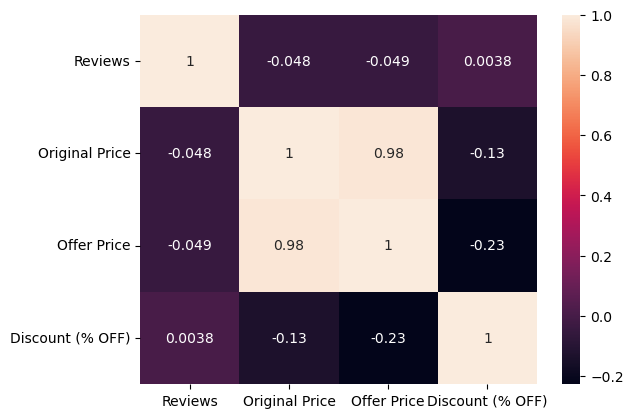

In [23]:
sns.heatmap(df.corr(), annot=True)

### DATA VISUALIZATION

In [24]:
df.columns

Index(['Product Name', 'Reviews', 'Original Price', 'Offer Price', 'Discount',
       'Free Gifts', 'Brand', 'Discount (% OFF)'],
      dtype='object')

# Factors and Insights:


#### LET'S FIND KEY METRICS

### Price difference

##### Calculate the price difference to analyze the discount amount provided for each product.

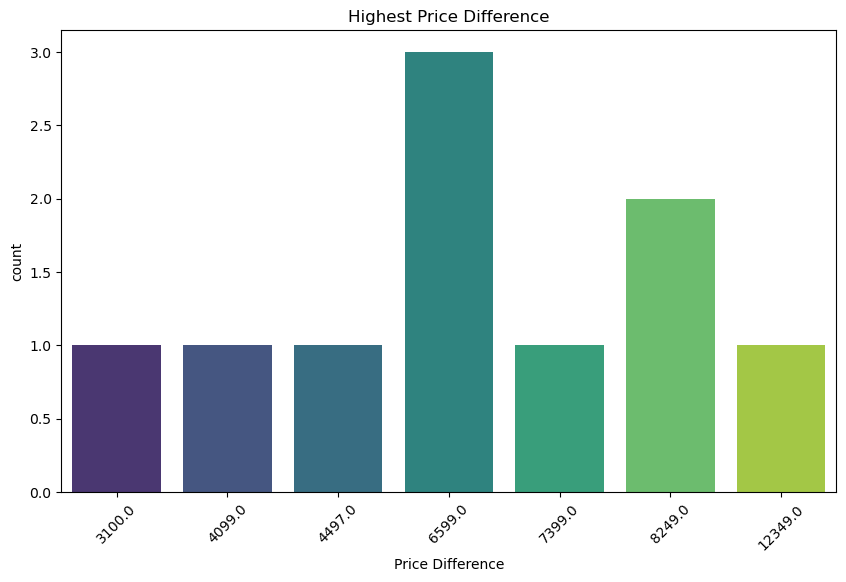

In [25]:
# Calculate the price difference
df['Price Difference'] = df['Original Price'] - df['Offer Price']

# Sort the DataFrame by Price Difference column
sorted_df = df.sort_values('Price Difference', ascending=False)

# Plot the price difference analysis using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Price Difference', data=sorted_df.head(10), palette='viridis')
plt.title('Highest Price Difference')
plt.xlabel('Price Difference')
plt.xticks(rotation=45)
plt.show()

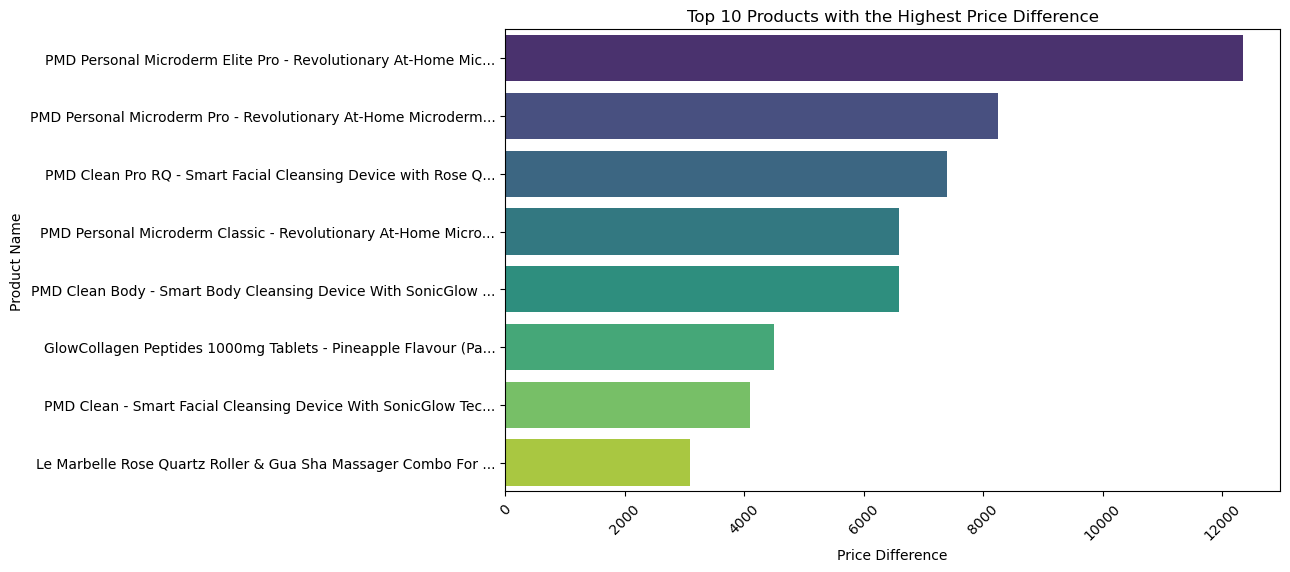

In [26]:
# Plot the price difference analysis using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Difference', y='Product Name', data=sorted_df.head(10), palette='viridis')
plt.title('Top 10 Products with the Highest Price Difference')
plt.ylabel('Product Name')
plt.xlabel('Price Difference')
plt.xticks(rotation=45)
plt.show()

### MOST RATED PRODUCT

<img src = 'https://www.nykaa.com/beauty-blog/wp-content/uploads/2019/06/The-New-Range-Of-Nykaa-Skin-Secrets-Sheet-Masks_bb255.jpg'>

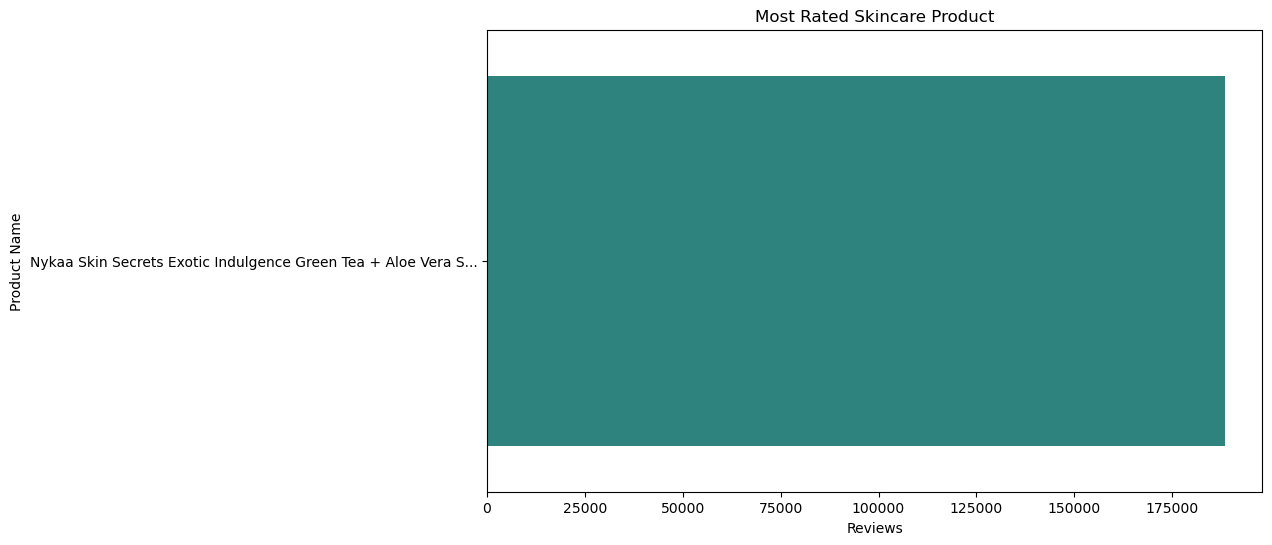

In [27]:
# Sort the DataFrame by Reviews column to get the most rated product
most_rated_product = df.sort_values('Reviews', ascending=False).iloc[0]

# Create a bar plot to visualize the most rated product
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='Product Name', data=pd.DataFrame([most_rated_product]), palette='viridis')
plt.title('Most Rated Skincare Product')
plt.xlabel('Reviews')
plt.ylabel('Product Name')
plt.show()

### BRAND ANALYSIS

##### Analyze the distribution of products across different brands ('Brand') to identify popular or prominent brands in the skincare category.

<img src ='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGwtAeSQH-EX7AXnmN57Ijxlbs3x90f9xe8A&usqp=CAU'>

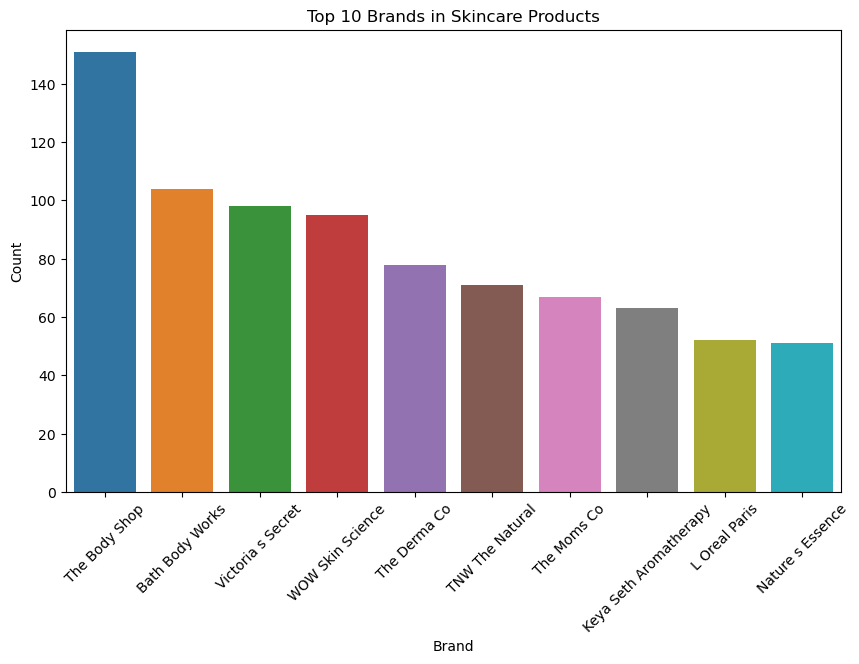

In [28]:
# Perform brand analysis
brand_counts = df['Brand'].value_counts()
top_brands = brand_counts.head(10)  # Select the top 10 brands for visualization

# Plot the brand analysis using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title('Top 10 Brands in Skincare Products')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### TOP RATED PRODUCTS

##### Identify the products with the highest ratings ('Reviews') to highlight the best-performing items.

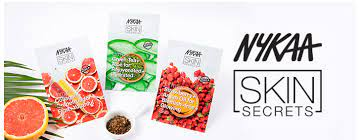

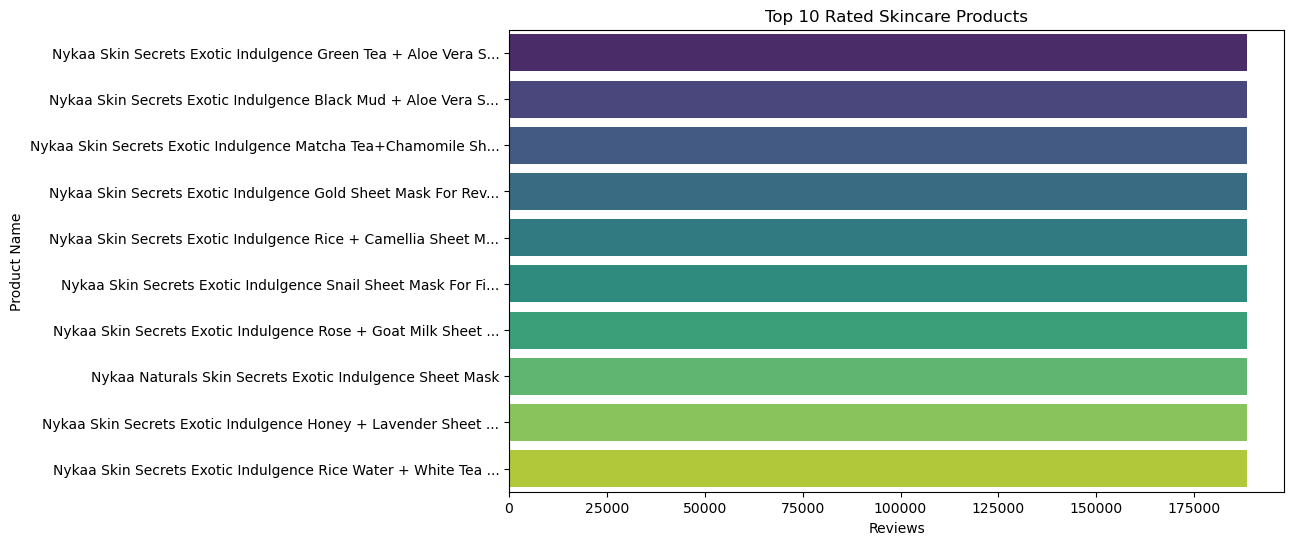

In [29]:
# Sort the DataFrame by Reviews column to get top-rated products
top_rated_products = df.sort_values('Reviews', ascending=False).head(10)

# Plot the top-rated products using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='Product Name', data=top_rated_products, palette='viridis')
plt.title('Top 10 Rated Skincare Products')
plt.xlabel('Reviews')
plt.ylabel('Product Name')
plt.show()

### Most discounted products

##### Identify products with the highest discount percentage to understand customer preferences for discounted items

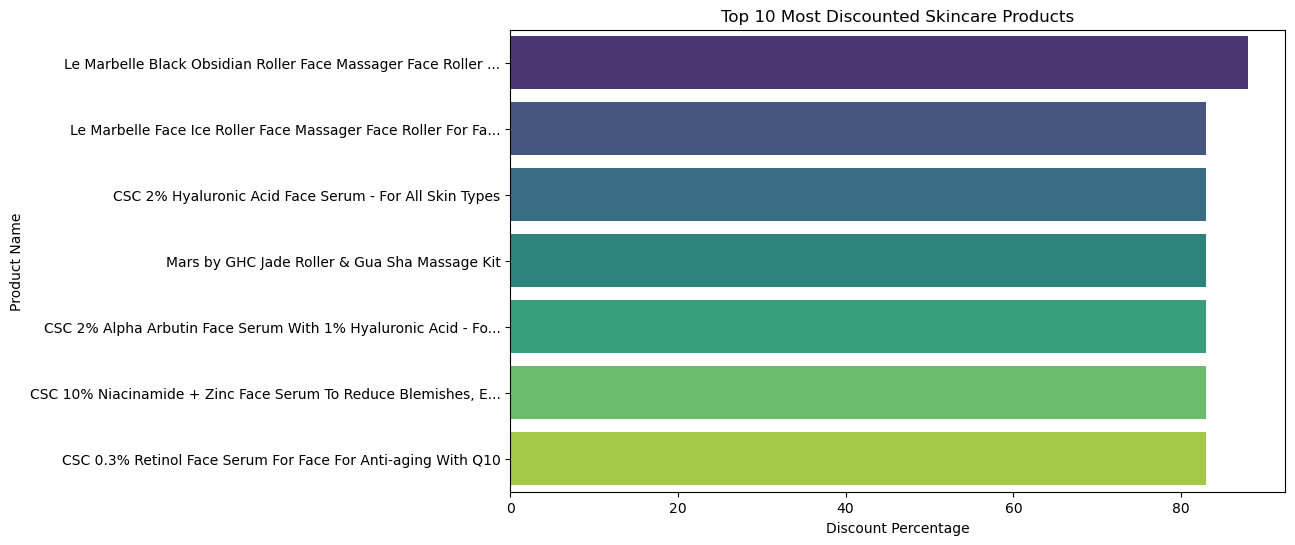

In [30]:
# Sort the DataFrame by Discount Percentage to get the most discounted products
most_discounted_products = df.sort_values('Discount (% OFF)', ascending=False).head(10)

# Plot the most discounted products using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Discount (% OFF)', y='Product Name', data=most_discounted_products, palette='viridis')
plt.title('Top 10 Most Discounted Skincare Products')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Name')
plt.show()

### Free gifts analysis:

##### Determine the most common types of free gifts offered and assess their impact on customer purchasing decisions

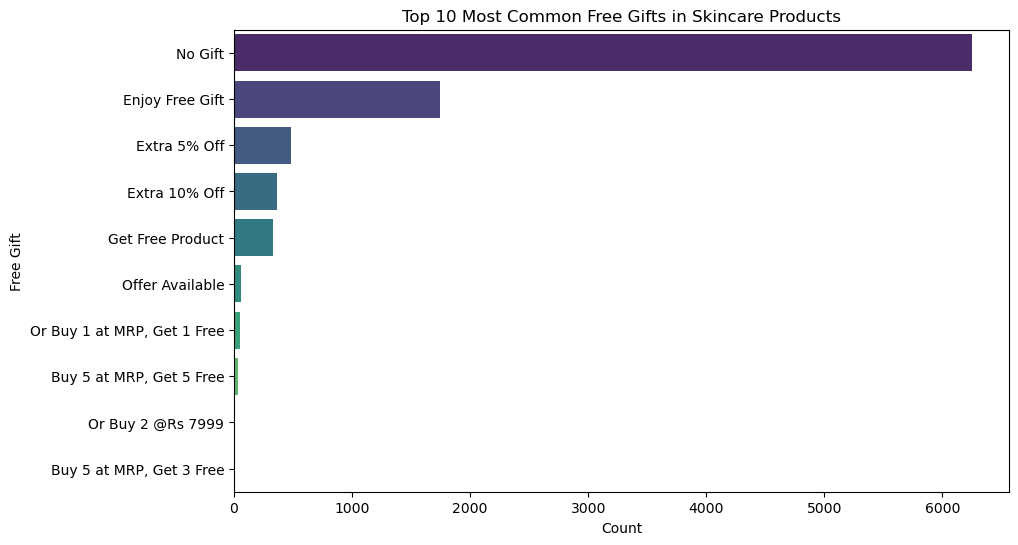

In [31]:
# Extract the unique free gifts and their frequencies
free_gift_counts = df['Free Gifts'].value_counts().reset_index()
free_gift_counts.columns = ['Free Gift', 'Count']

# Sort the free gifts by count in descending order
free_gift_counts.sort_values('Count', ascending=False, inplace=True)

# Plot the free gifts analysis using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Free Gift', data=free_gift_counts.head(10), palette='viridis')
plt.title('Top 10 Most Common Free Gifts in Skincare Products')
plt.xlabel('Count')
plt.ylabel('Free Gift')
plt.show()